In [1]:
import numpy as np
import pandas as pd
from src import Models
from src import Evaluate
from src import DataImport
import matplotlib.pyplot as plt
from pathlib import Path

df = DataImport.data_reader(bio=False)
df_bio = DataImport.data_reader(bio=True)
domains = DataImport.domain_dict()
df_by_us = DataImport.data_reader_by_us()


FileNotFoundError: [Errno 2] No such file or directory: 'Bio_data/bio_all_raw_columns_no_missing.csv'

In [ ]:
def characteristic_compare(df_by_us, df_author):
    null_records=pd.DataFrame(columns=['column','dataset_mark','max','min','mean','uniques','null'])

    count=0
    df_by_us.rename(columns={'death':'deathYN','deathYear':'death_year','deathMonth':'death_month','ZwealthT':'Zwealth', 'ZincomeT':'Zincome'},inplace=True)
    for column in df_by_us.columns:
        if column in list(df_author.columns):

            author_column  = df_author.loc[:,column].replace({' ':None,'True':1,'False':0}).astype(float)
            null_records = null_records.append({'column':column, 'dataset_mark':'author', 'max':max(author_column), 'min':min(author_column), 'mean':np.mean(author_column),'uniques':len(author_column.unique()), 'null':author_column.isnull().sum()},
                                               ignore_index=True)

            count+=1
        else:
            continue

        our_column=df_by_us[column]
        our_column = our_column.replace({' ': None, 'True': 1, 'False': 0}).astype(float)
        null_records=null_records.append({'column':column,'dataset_mark':'us','max':max(our_column),'min':min(our_column), 'mean':np.mean(our_column),'uniques':len(our_column.unique()),'null':our_column.isnull().sum()},ignore_index=True)

    return null_records



# Figure 1  hist of death

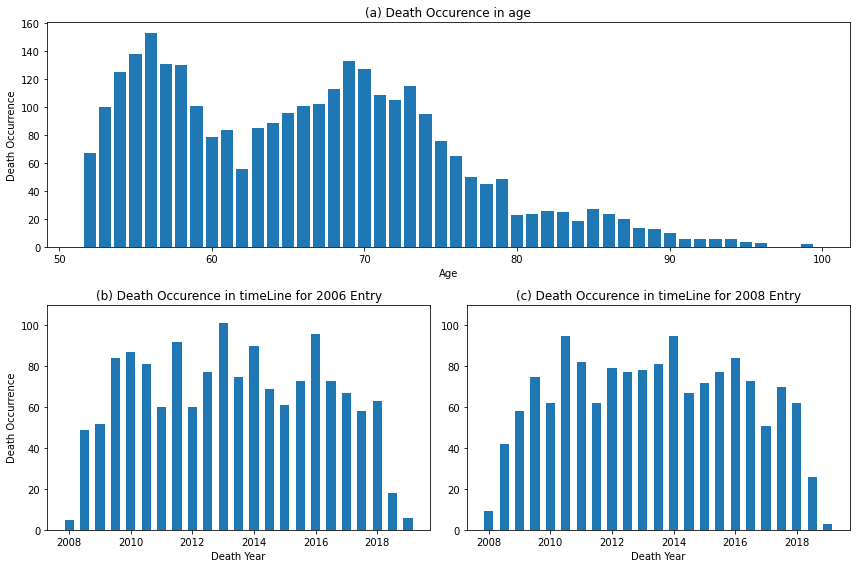

In [11]:

# plot part of data
# 1. hist of death
df_deaths= pd.DataFrame(df_by_us[['death','age']].value_counts())
df_deaths=df_deaths.reset_index(drop=False)
df_deaths=df_deaths.loc[df_deaths['death']==1,]


df_by_us['deathYR_half']=[x if y<=6 else x+0.5 for x,y in zip(df_by_us['death_year'],df_by_us['death_month'])]
df_deaths_time=pd.DataFrame(df_by_us[['death','deathYR_half','interview_year']].value_counts())
df_deaths_time=df_deaths_time.reset_index(drop=False)
df_deaths_time=df_deaths_time.loc[df_deaths_time['death']==1,]



plt.figure(figsize=(12, 8))
fig = plt.gcf()
fig.subplots_adjust(left=0.08,right=0.95,top=0.95,bottom=0.1)
ax1 = plt.subplot2grid((2, 4), (0, 0), colspan=4)
ax1.bar(df_deaths['age'],df_deaths[0])
ax1.set_xlabel('Age')
ax1.set_title('(a) Death Occurence in age')
ax1.set_ylabel('Death Occurrence')

# The second one is on column2, spread on 3 columns
ax2 = plt.subplot2grid((2, 4), (1, 0), colspan=2)
temp=df_deaths_time.loc[df_deaths_time['interview_year']==2006,]
temp=temp.sort_values(by='deathYR_half')
ax2.bar(temp['deathYR_half'],temp[0],width=0.3)
ax2.set_ylim(0,170)
ax2.set_title('(b) Death Occurence in Timeline for 2006 Entry')
ax2.set_xlabel('Death Year')
ax2.set_ylabel('Death Occurrence')

# The last one is spread on 1 column only, on the 4th column of the second line.
ax3 = plt.subplot2grid((2, 4), (1, 2), colspan=2)
temp=df_deaths_time.loc[df_deaths_time['interview_year']==2008,]
temp=temp.sort_values(by='deathYR_half')
ax3.set_ylim(0,170)
ax3.set_title('(c) Death Occurence in Timeline for 2008 Entry')
ax3.bar(temp['deathYR_half'],temp[0],width=0.3)
ax3.set_xlabel('Death Year')

fig.tight_layout()
# Show the graph
plt.savefig(Path.cwd()/'graphs/fig1_death_timeline.pdf')
plt.show()
